## <b>🏦✨ Loan Approval Prediction 💸🕴️</b>
Individual Final Project of Data Mining and Visualization A<br>
Nalini Mahastuti Panunjul | 5003221157<br>


##### <span style="color: green;"><b>Preprocessing

<span style="color: blue;"><b>01 Load Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print('import libraries success')

import libraries success


In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv', index_col=0)
original = pd.read_csv('original.csv')

print('load dataset success')

load dataset success


<span style="color: blue;"><b>02 Dataset Overview

In [3]:
# original data overview
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
# train data overview
display(train.shape)
train.info()
train.isna().sum()

(58645, 12)

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

<span style="color: blue;"><b>03 Variable Explanation</b></span>
<table style="border-collapse: collapse; width: 100%; border: none;">
  <!-- <tr style="border: none;">
    <th style="text-align: left; border: none;">Variable</th>
    <th style="text-align: left; border: none;">Description</th>
  </tr> -->
  <tr style="border: none;">
    <td style="border: none;">person_age</td>
    <td style="border: none;">The age of the individual applying for the loan.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">person_income</td>
    <td style="border: none;">The annual income of the individual.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">person_home_ownership</td>
    <td style="border: none;">The individual's home ownership status (e.g., owns or rents).</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">person_emp_length</td>
    <td style="border: none;">The length of the individual's employment experience in years.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">loan_intent</td>
    <td style="border: none;">The primary purpose of the individual's loan application (e.g., education, vehicle purchase).</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">loan_grade</td>
    <td style="border: none;">The credit worthiness rating assigned based on the individual's credit score.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">loan_amnt</td>
    <td style="border: none;">The total amount of the loan applied for by the individual.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">loan_int_rate</td>
    <td style="border: none;">The interest rate charged on the loan.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">loan_percent_income</td>
    <td style="border: none;">The percentage of the individual's income allocated for loan repayment.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">cb_person_default_on_file</td>
    <td style="border: none;">Indicates whether the individual has a record of defaulting on credit.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">cb_person_cred_hist_length</td>
    <td style="border: none;">The length of the individual's credit history in years.</td>
  </tr>
  <tr style="border: none;">
    <td style="border: none;">loan_status</td>
    <td style="border: none;">The status of the loan application (e.g., approved, pending, or denied).</td>
  </tr>
</table>


<span style="color: blue;"><b>04 Concatenate Datasets

In [5]:
# show dataset
df = pd.concat([train, original])
target = 'loan_status'
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [6]:
display(df.isna().sum())
display(df.dtypes)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

<span style="color: blue;"><b>05 Fill NA Rows

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import copy

In [8]:
df2 = copy.deepcopy(df)
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [9]:
# impute
missing = df2.loc[:, df2.isna().mean() > 0].columns
df2[missing] = SimpleImputer().fit_transform(df2[missing])

In [10]:
# encode
# categorical = df2.loc[:,df2.dtypes == "object"].columns
# df2[categorical] = df2[categorical].apply(lambda x: LabelEncoder().fit_transform(x))

<span style="color: blue;"><b>06 Export Data to excel [RShiny use]

In [11]:
# df2.to_excel("rshiny.xlsx", index=False, sheet_name="Sheet1")

##### <span style="color: green;"><b>EDA</b>

<span style="color: blue;"><b>01 Summary Statistics

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           91226 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               91226 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [13]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,91226.0,27.616480,6.148115,20.00,23.00,26.000000,30.00,144.00
person_income,91226.0,64770.706224,47936.961097,4000.00,40000.00,57000.000000,78000.00,6000000.00
person_emp_length,91226.0,4.732119,4.005274,0.00,2.00,4.000000,7.00,123.00
loan_amnt,91226.0,9350.348607,5848.605423,500.00,5000.00,8000.000000,12000.00,35000.00
loan_int_rate,91226.0,10.789508,3.055439,5.42,7.88,10.789508,12.99,23.22
loan_percent_income,91226.0,0.163154,0.097491,0.00,0.09,0.140000,0.22,0.83
cb_person_cred_hist_length,91226.0,5.810219,4.038412,2.00,3.00,4.000000,8.00,30.00
loan_status,91226.0,0.169447,0.375149,0.00,0.00,0.000000,0.00,1.00


##### <span style="color: green;"><b>Feature Selection</b>

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           91226 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               91226 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


<span style="color: blue;"><b>01 Numeric

In [15]:
from scipy.stats import spearmanr

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

spearman_correlations = {}
target_column = 'loan_status'

numerical_features = ['person_age', 'person_income', 'person_emp_length',
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                      'cb_person_cred_hist_length']

for feature in numerical_features:
    spearman_corr, _ = spearmanr(df2[feature], df2[target_column])
    spearman_correlations[feature] = spearman_corr

threshold = 0.1
selected_features = [feature for feature, corr in spearman_correlations.items() if abs(corr) > threshold]

print("Fitur yang dipilih:", selected_features)

Fitur yang dipilih: ['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']


<span style="color: blue;"><b>02 Categorical

In [17]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
df_encoded = pd.get_dummies(df2.iloc[:, :-1])

In [ ]:
# Tentukan jumlah fitur terbaik yang ingin dipilih
k = 2  # Misalnya memilih 2 fitur terbaik

# Pilih fitur terbaik dengan uji korelasi chi-square
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(df_encoded, df['loan_status'])  # loan_status sebagai target

# Dapatkan indeks fitur yang dipilih
selected_indices = selector.get_support(indices=True)

# Tampilkan nama fitur yang dipilih
selected_feature_names = df_encoded.columns[selected_indices]
print("Fitur yang dipilih:", selected_feature_names)

# Buat DataFrame baru dengan fitur terpilih dan target
selected_data = df_encoded[selected_feature_names].copy()
selected_data['loan_status'] = df['loan_status']  # Tambahkan variabel target ke dataframe baru

# Tampilkan DataFrame hasil seleksi
print(selected_data)


Fitur yang dipilih: Index(['person_income', 'loan_amnt'], dtype='object')
       person_income  loan_amnt  loan_status
0              35000       6000            0
1              56000       4000            0
2              28800       6000            0
3              70000      12000            0
4              60000       6000            0
...              ...        ...          ...
32576          53000       5800            0
32577         120000      17625            0
32578          76000      35000            1
32579         150000      15000            0
32580          42000       6475            0

[91226 rows x 3 columns]


<span style="color: blue;"><b>03 Backward Elimination

In [20]:
#%pip install mlxtend

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [22]:
# Misalkan 'df2' sudah ada dan kolom terakhir adalah target ('loan_status')
X = df2.iloc[:, :-1]  # Semua fitur kecuali target
y = df2['loan_status']  # Target

# Pastikan semua fitur dalam X adalah numerik
X_encoded = pd.get_dummies(X)  # Ubah data kategorikal menjadi numerik

# Buat model regresi linear
regression = LinearRegression()

# Buat Step-wise Backward Selector
sfs_backward = SFS(
    regression,
    k_features=3,          # Jumlah fitur yang ingin dipilih
    forward=False,         # Backward selection
    floating=False,
    verbose=2,
    scoring='neg_mean_squared_error',  # Skor evaluasi
    cv=4                 # Cross-validation dengan 4 lipatan
)

# Fit selector ke data
sfs_backward = sfs_backward.fit(X_encoded, y)

# Dapatkan indeks fitur yang terpilih
selected_feature_indices = list(sfs_backward.k_feature_idx_)

# Dapatkan nama-nama fitur yang terpilih
selected_feature_names = [X_encoded.columns[i] for i in selected_feature_indices]

# Cetak nama fitur yang terpilih
print('Fitur yang dipilih:', selected_feature_names)

c:\Users\nalin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\nalin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
c:\Users\nalin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\nalin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters vi

Fitur yang dipilih: ['loan_percent_income', 'loan_grade_A', 'loan_grade_B']


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished

[2024-12-19 17:16:44] Features: 3/3 -- score: -0.11061026859127607

##### <span style="color: green;"><b>Classification Analysis</b>

<span style="color: blue;"><b>01 SVM

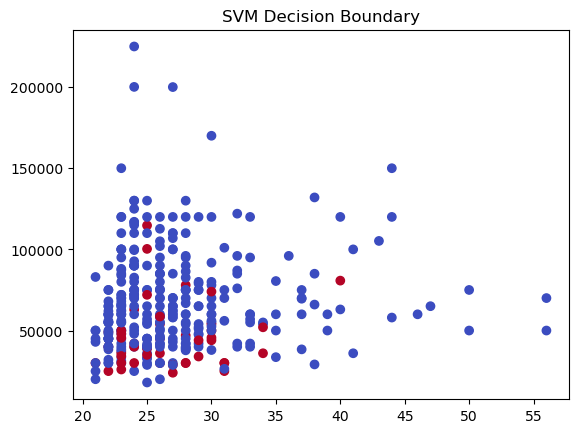

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Data Preparation (assuming df2 is already defined)
X = pd.get_dummies(df2.iloc[:, :-1])  # Encode categorical features
y = df2['loan_status']  # Target (binary: 0 or 1)

# Reduce data size to speed up computation (take the first 500 rows)
X = X.iloc[:500, :]
y = y.iloc[:500]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model with linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Quick 2D Plotting (only first two features for simplicity)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='coolwarm')
plt.title("SVM Decision Boundary")

# We can skip decision boundary plotting to save time for now
plt.show()

<span style="color: blue;"><b>02 SVR

Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}

=== SVR Evaluation ===
Mean Squared Error (MSE): 3357034.7498
Mean Absolute Error (MAE): 1286.4372
R^2 Score: 0.8938


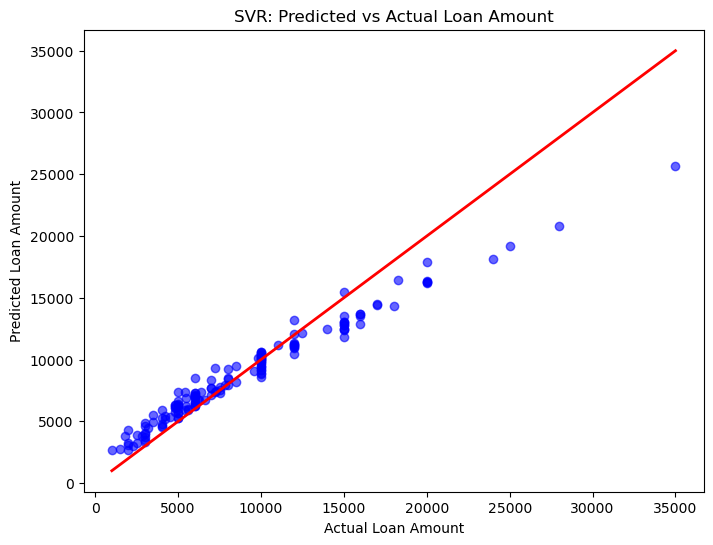

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = pd.get_dummies(df2.iloc[:, :-1])
y = df2['loan_amnt']

X = X.iloc[:500, :]
y = y.iloc[:500]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1],
    'epsilon': [0.1, 0.2]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, verbose=0, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_svr = grid_search.best_estimator_

y_pred = best_svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== SVR Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('SVR: Predicted vs Actual Loan Amount')
plt.show()


##### <span style="color: green;"><b>Training Testing</b>

<span style="color: blue;"><b>01 Repeated Holdout

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
X = pd.get_dummies(df2.iloc[:, :-1])  # Encode fitur kategorikal
y = df2['loan_status']  # Target

# Inisialisasi Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# 1. Repeated Holdout
print("=== Repeated Holdout ===")
holdout_accuracies = []
for i in range(5):  # Ulangi 5 kali
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    dt_model.fit(X_train, y_train)  # Train
    y_pred = dt_model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)
    holdout_accuracies.append(accuracy)

print(f"Repeated Holdout Accuracies: {holdout_accuracies}")
print(f"Mean Accuracy (Repeated Holdout): {sum(holdout_accuracies) / len(holdout_accuracies):.4f}")

=== Repeated Holdout ===
Repeated Holdout Accuracies: [0.904377375036539, 0.9056197018415668, 0.9066793335282082, 0.9058023969599532, 0.9045235311312482]
Mean Accuracy (Repeated Holdout): 0.9054


<span style="color: blue;"><b>02 K-Fold Cross Validation

In [27]:

# 2. K-Fold Cross Validation
print("\n=== K-Fold Cross Validation ===")
k = 5  # atau 10
kf = RepeatedStratifiedKFold(n_splits=k, n_repeats=3, random_state=42)
cv_scores = cross_val_score(dt_model, X, y, cv=kf, scoring='accuracy')

print(f"K-Fold CV Accuracies: {cv_scores}")
print(f"Mean Accuracy (K-Fold CV): {cv_scores.mean():.4f}")


=== K-Fold Cross Validation ===
K-Fold CV Accuracies: [0.90836348 0.90359002 0.91071526 0.90364483 0.90463141 0.90945961
 0.90791998 0.91098931 0.90654974 0.90791998 0.91006248 0.9097835
 0.90380926 0.90534393 0.90824884]
Mean Accuracy (K-Fold CV): 0.9074


##### <span style="color: green;"><b>Accuracy</b>

In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_predict
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score,
    accuracy_score, recall_score, classification_report
)
import matplotlib.pyplot as plt

Confusion Matrix:
 [[21389  1382]
 [ 1195  3402]]

=== Metrics ===
Accuracy: 0.9058
Sensitivity: 0.7400
Specificity: 0.9393
AUC: 0.8397


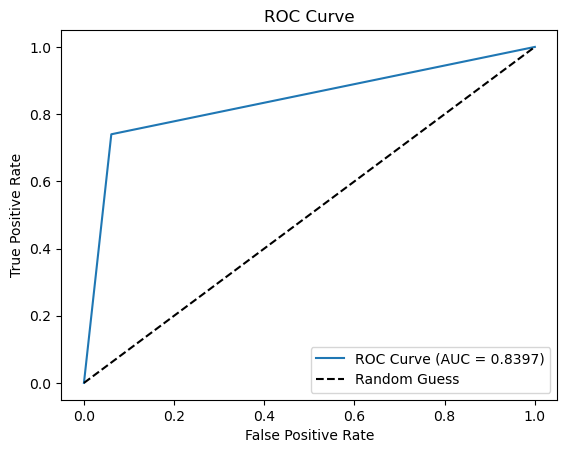

In [30]:
# Data Preparation
X = pd.get_dummies(df2.iloc[:, :-1])  # Encode fitur kategorikal
y = df2['loan_status']  # Target

# Split data for single holdout evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk ROC

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:\n", cm)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # Sensitivitas
specificity = tn / (tn + fp)

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Print Results
print("\n=== Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc_score:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
